In [162]:
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


# Model Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
# Miscellaneous
import warnings
warnings.filterwarnings('ignore')

In [163]:
data = pd.read_csv('Loan_default.csv')

# Display first few rows
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [164]:
# Check dataset shape and basic info
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

Dataset Shape: (255347, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner  

In [165]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [166]:
# Display basic statistical summary
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [167]:
numerical_cols = ['Age', 'MonthsEmployed', 'LoanTerm', 'DTIRatio']
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus']
yes_no_cols = ['HasMortgage', 'HasDependents']

age_mean = np.round(data['Age'].mean(), 2)
months_employed_mean = np.round(data['MonthsEmployed'].mean(), 2)
loan_term_mean = np.round(data['LoanTerm'].mean(), 2)
dti_ratio_mean = np.round(data['DTIRatio'].mean(), 2)

education_mode = data['Education'].mode()[0]
employment_type_mode = data['EmploymentType'].mode()[0]
marital_status_mode = data['MaritalStatus'].mode()[0]
has_mortgage_mode = data['HasMortgage'].mode()[0]
has_dependents_mode = data['HasDependents'].mode()[0]


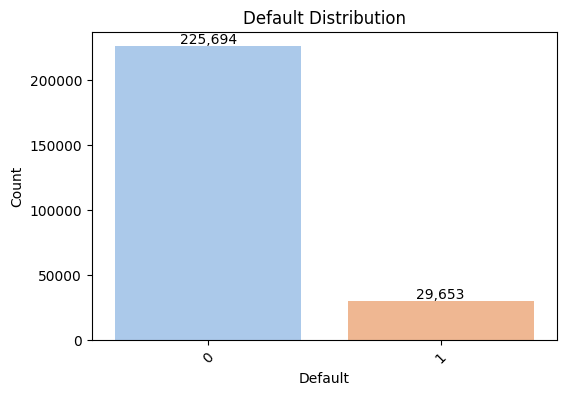

In [168]:
# Target distribution
def plot_target_distribution(data):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Default', data=data, palette='pastel')
    plt.title("Default Distribution")
    plt.xlabel("Default")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    # annotate counts on bars
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(format(int(p.get_height()), ","), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom')
    plt.show()

# Call the function
plot_target_distribution(data)

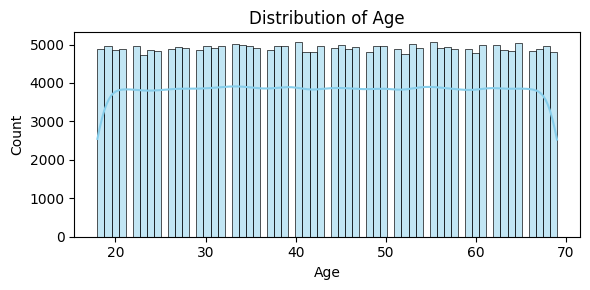

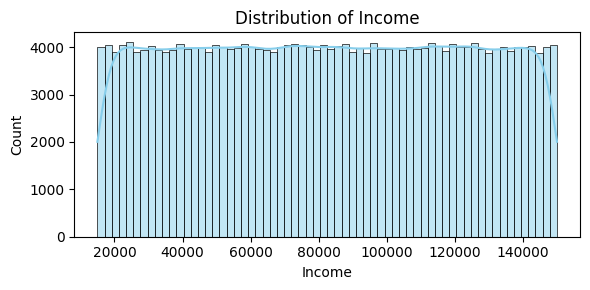

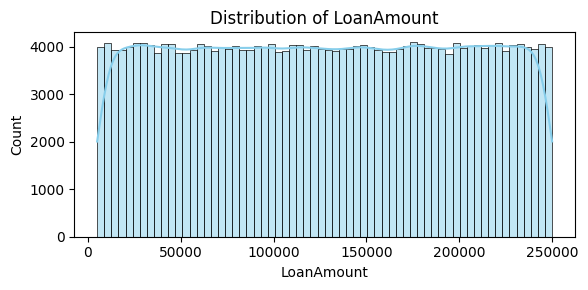

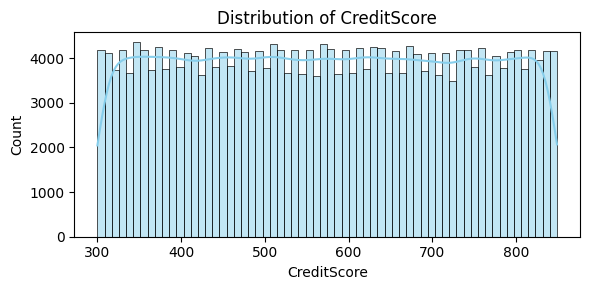

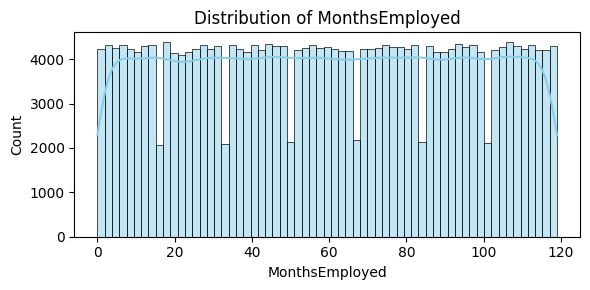

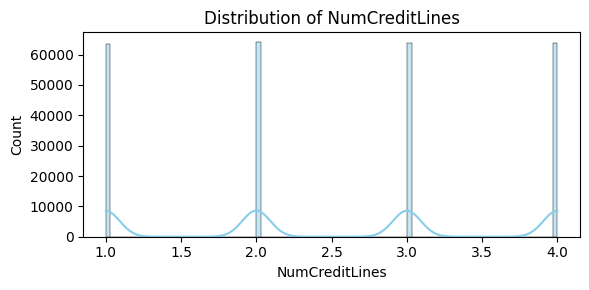

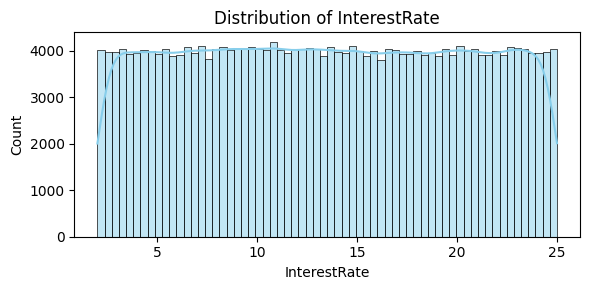

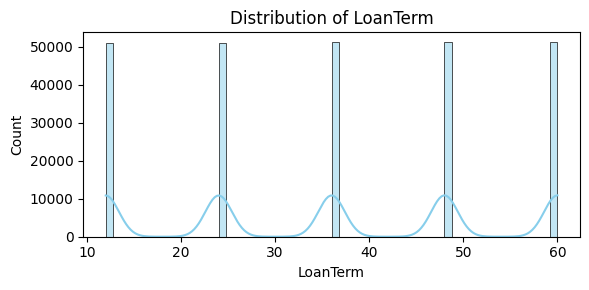

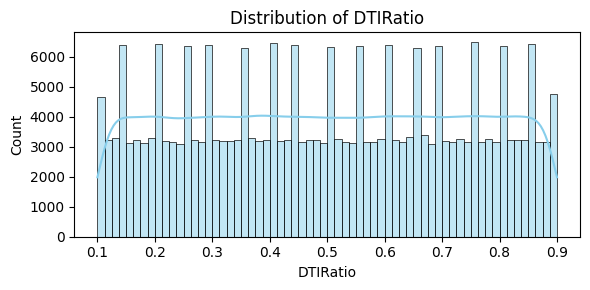

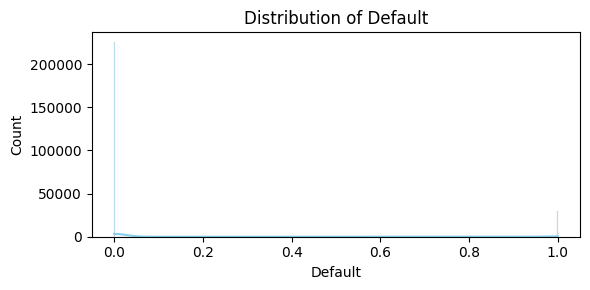

In [169]:
# Identify numeric columns first
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plots for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

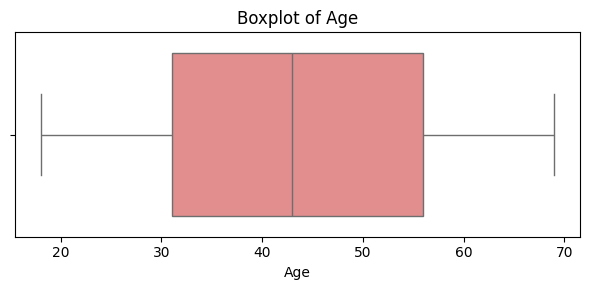

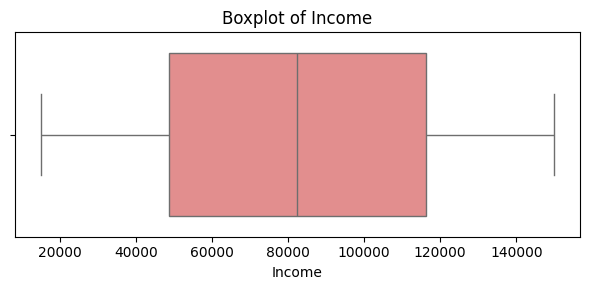

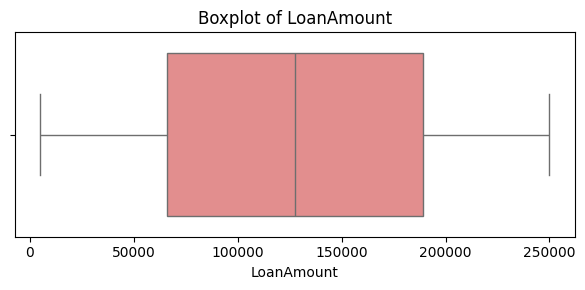

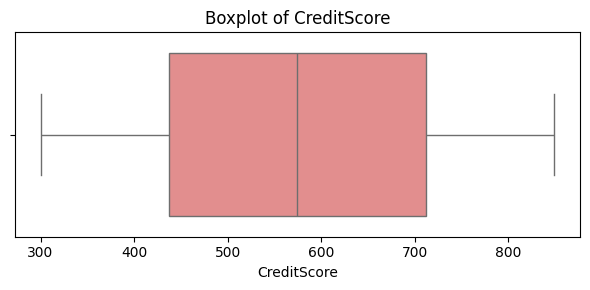

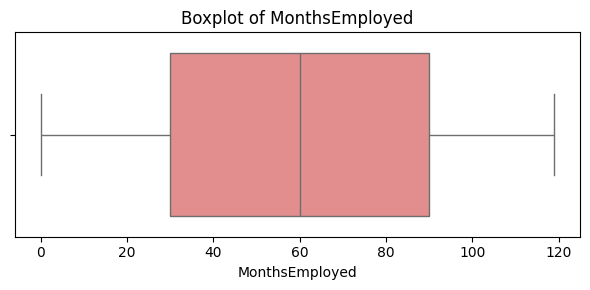

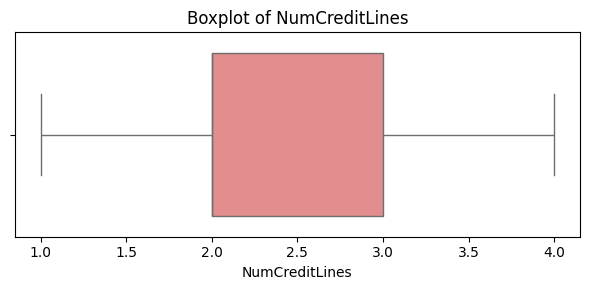

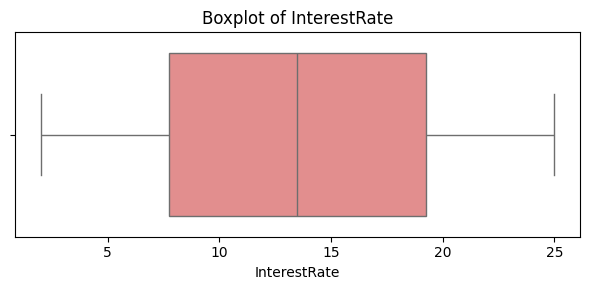

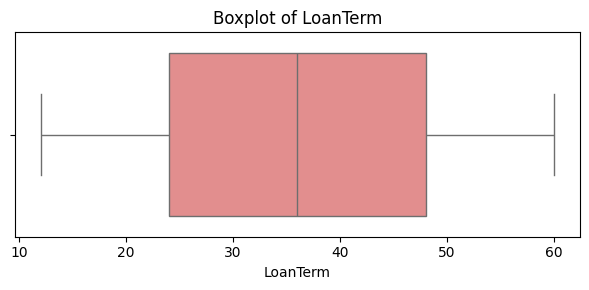

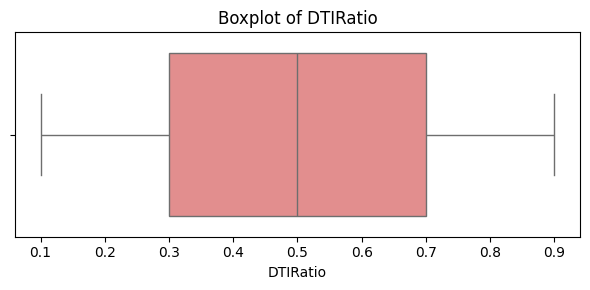

In [170]:
#  Boxplots to inspect outliers for numeric features
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop(['Default'], errors='ignore').tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

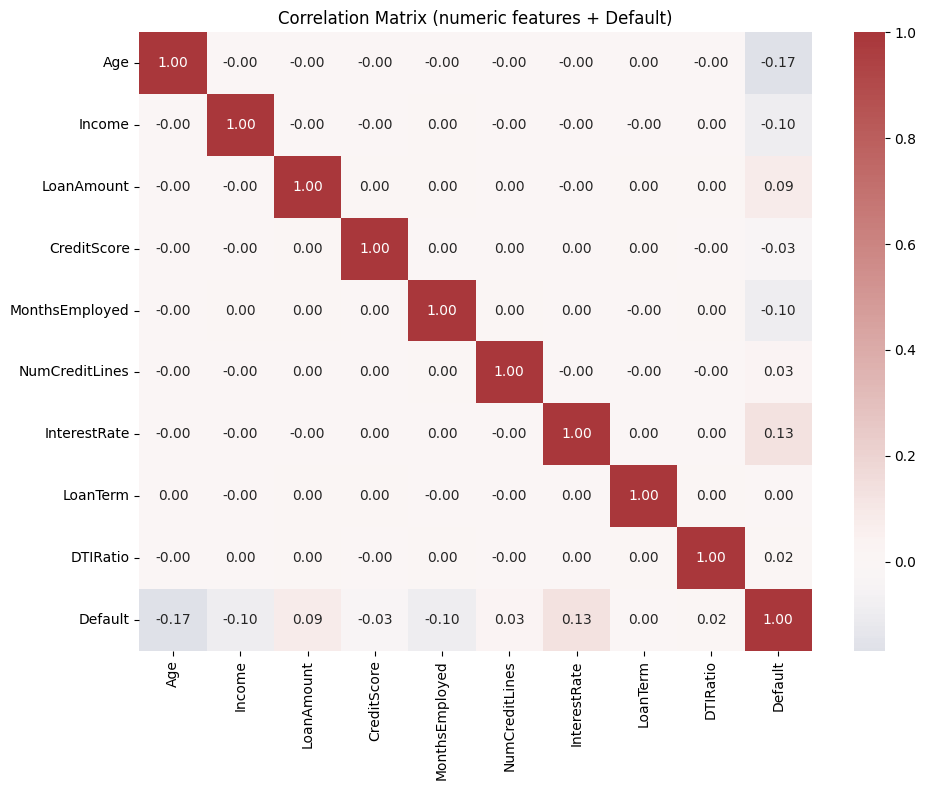

In [171]:
# ensure numeric_cols exists (don't overwrite if already defined)
if 'numeric_cols' not in globals():
    numeric_cols = data.select_dtypes(include=[np.number]).columns.drop(['Default'], errors='ignore').tolist()

#  Correlation heatmap for numeric features (including target)
plt.figure(figsize=(10, 8))
corr_cols = [c for c in numeric_cols if c in data.columns] + (['Default'] if 'Default' in data.columns else [])
sns.heatmap(data[corr_cols].corr(), annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title("Correlation Matrix (numeric features + Default)")
plt.tight_layout()
plt.show()

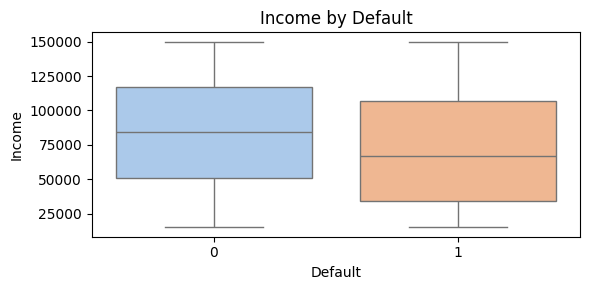

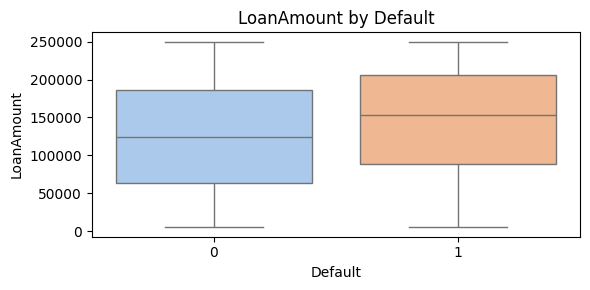

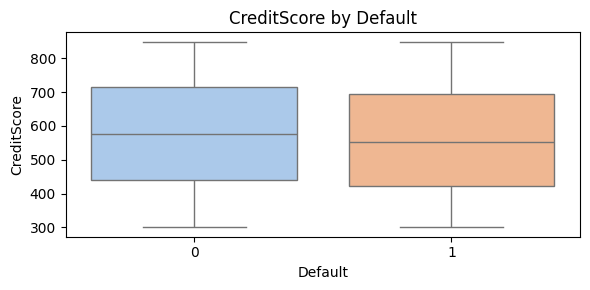

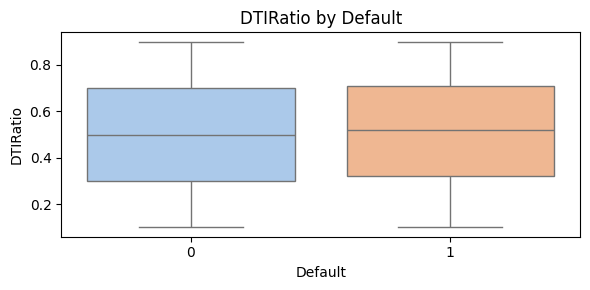

In [172]:
#  Boxplots of numeric features split by Default
box_features = [f for f in ['Income', 'LoanAmount', 'CreditScore', 'DTIRatio'] if f in data.columns]
for col in box_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Default', y=col, data=data, palette='pastel')
    plt.title(f"{col} by Default")
    plt.tight_layout()
    plt.show()

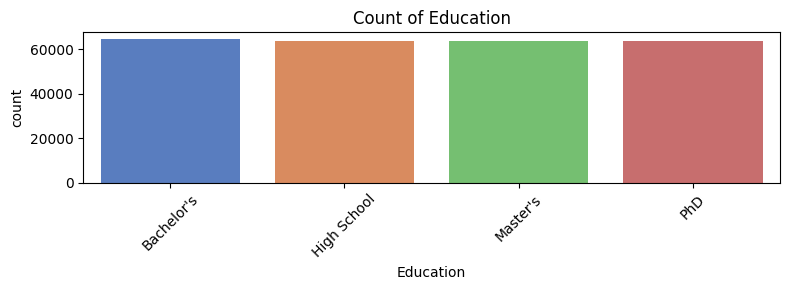

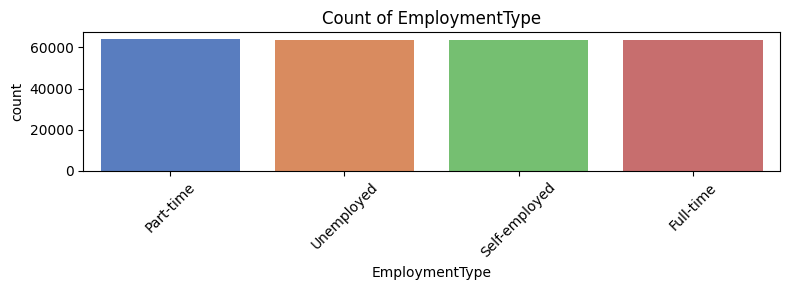

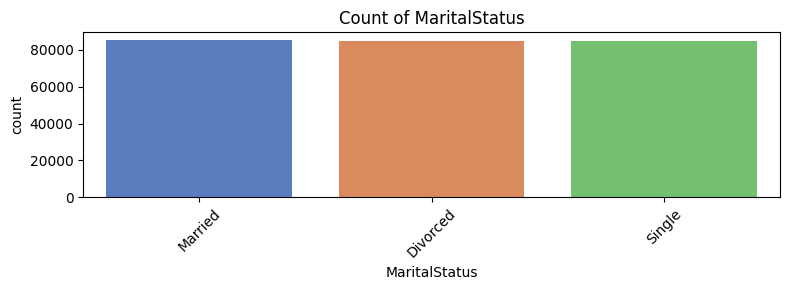

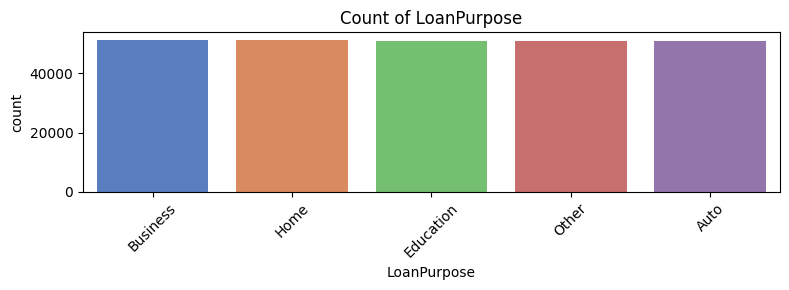

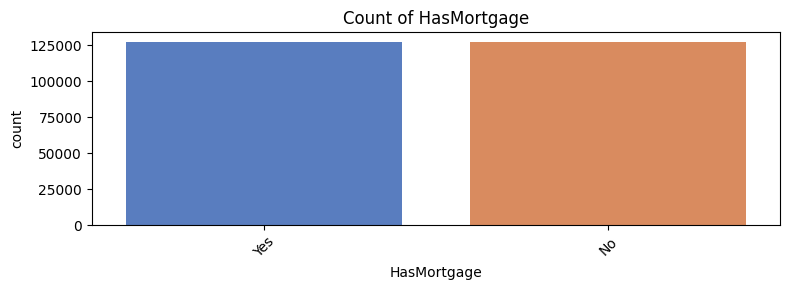

In [173]:
cat_features = [f for f in ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage'] if f in data.columns]
for col in cat_features:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=col, data=data, order=data[col].value_counts().index, palette='muted')
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

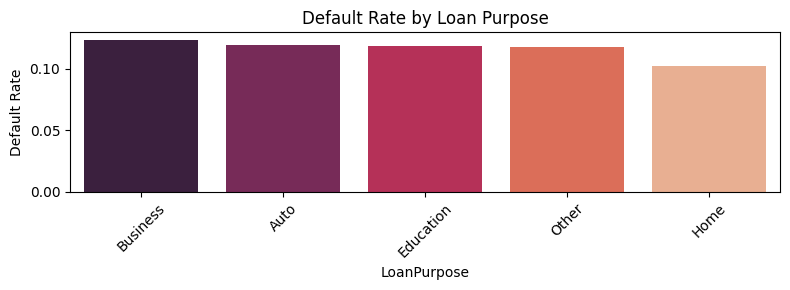

In [174]:
if 'LoanPurpose' in data.columns:
    purpose_rate = data.groupby('LoanPurpose')['Default'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 3))
    sns.barplot(x=purpose_rate.index, y=purpose_rate.values, palette='rocket')
    plt.ylabel("Default Rate")
    plt.title("Default Rate by Loan Purpose")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [175]:
# Data Preprocessing 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1) Drop irrelevant columns
if 'LoanID' in data.columns:
    data = data.drop('LoanID', axis=1)
if 'LoanPurpose' in data.columns:
    data = data.drop('LoanPurpose', axis=1)


# 2) Handle missing values
data = data.dropna()  # alternatively: data.fillna(method='ffill', inplace=True)

# 3) Encode categorical variables
categorical_cols = [
    'Education', 'EmploymentType', 'MaritalStatus',
    'HasMortgage', 'HasDependents', 'HasCoSigner'
]

# Normalize strings in dataset
def normalize_string(s):
    return str(s).strip().lower()

data[categorical_cols] = data[categorical_cols].astype(str).applymap(normalize_string)

# Fit OrdinalEncoder on dataset
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])

# 4) Separate features and target variable
X = data.drop('Default', axis=1)
y = data['Default']

# 5) Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6) Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (178742, 15)
Testing set shape: (76605, 15)


In [176]:
# Model Training and Evaluation 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd

# use only faster models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(
        tree_method='hist',          # ✅ use CPU mode instead of gpu_hist
        predictor='cpu_predictor',   # ✅ ensure CPU prediction
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    results.append([name, acc, prec, rec, f1, specificity, sensitivity])

results_df = pd.DataFrame(results, columns=[
    'Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity', 'Sensitivity'
])

print("Model Evaluation Results:\n")
display(results_df.sort_values(by='Accuracy', ascending=False))


Model Evaluation Results:



,Model,Accuracy,Precision,Recall,F1-Score,Specificity,Sensitivity
2,Random Forest,0.885686,0.622144,0.039793,0.074802,0.996825,0.039793
0,Logistic Regression,0.885360,0.626106,0.031812,0.060548,0.997504,0.031812
3,Naive Bayes,0.884864,0.669643,0.016862,0.032895,0.998907,0.016862
4,XGBoost,0.884642,0.521117,0.081835,0.141455,0.990119,0.081835
1,Decision Tree,0.803799,0.203442,0.236511,0.218734,0.878332,0.236511


In [177]:
model_decision_tree = DecisionTreeClassifier(random_state=42)

model_decision_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [178]:
# Model Performance Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# sort results
results_df_sorted = results_df.sort_values(by='Accuracy', ascending=False)
models_sorted = results_df_sorted['Model']

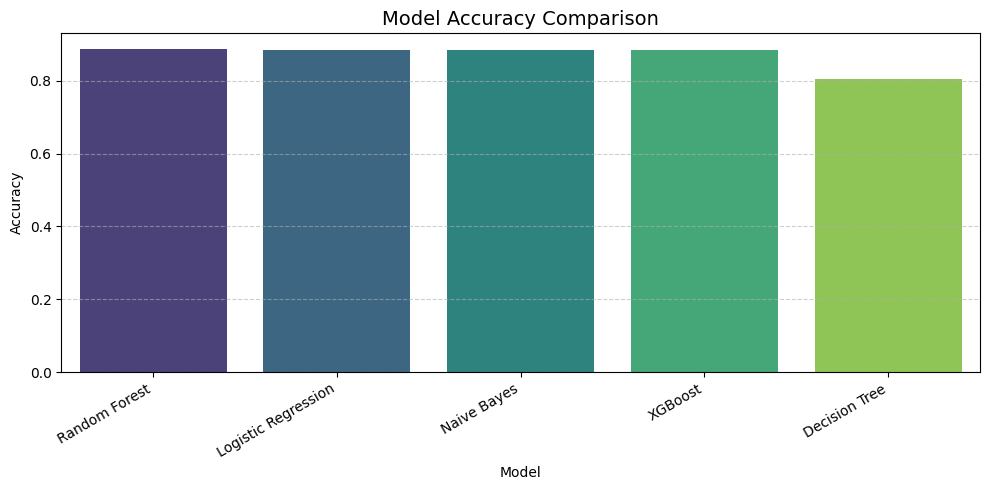

In [179]:
# 1) Accuracy Comparison
plt.figure(figsize=(10,5))
sns.barplot(data=results_df_sorted, x='Model', y='Accuracy', palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

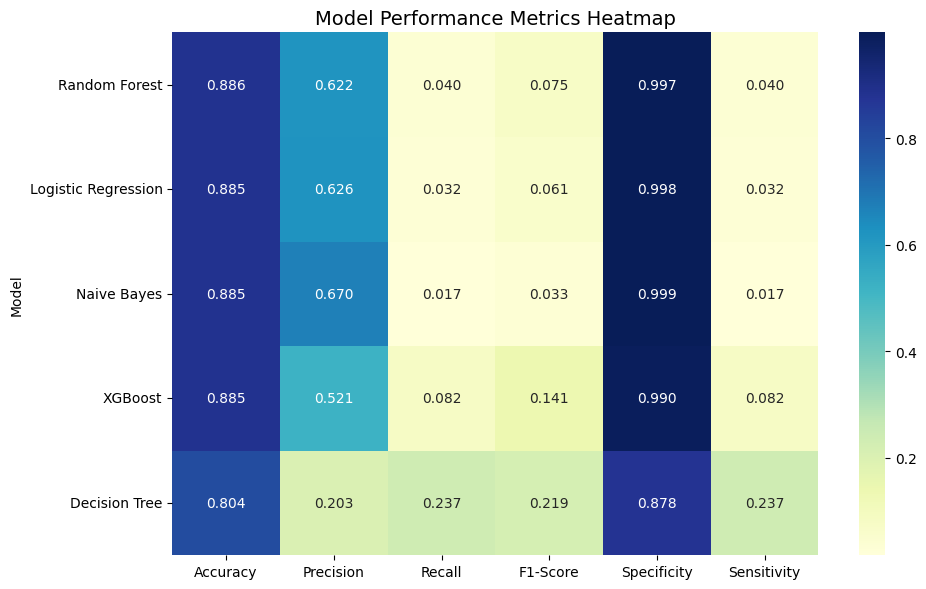

In [180]:
# 2) Heatmap of Metrics
metrics_cols = ['Accuracy','Precision','Recall','F1-Score','Specificity','Sensitivity']
plt.figure(figsize=(10,6))
sns.heatmap(results_df_sorted.set_index('Model')[metrics_cols], annot=True, cmap='YlGnBu', fmt=".3f", cbar=True)
plt.title('Model Performance Metrics Heatmap', fontsize=14)
plt.tight_layout()
plt.show()

In [181]:
# Input functions
def get_float_input(prompt, required=False, default=None):
    while True:
        value = input(prompt)
        if not value:
            if required:
                print("This field is required.")
                continue
            return default
        try:
            return float(value)
        except ValueError:
            print("Please enter a valid number.")

def get_string_input(prompt, required=False, default=None):
    while True:
        value = input(prompt)
        if value:
            return value
        if not required:
            return default
        print("This field is required.")

def get_yes_no_input(prompt, required=False, default=None):
    while True:
        value = input(prompt + " (yes/no): ").lower()
        if not value:
            if required:
                print("This field is required.")
                continue
            return default
        if value in ["yes", "no"]:
            return value
        print("Please enter 'yes' or 'no'.")

# Mandatory fields
income = get_float_input("Enter Income: ", required=True)
loan_amount = get_float_input("Enter LoanAmount: ", required=True)
credit_score = get_float_input("Enter CreditScore: ", required=True)
num_credit_lines = get_float_input("Enter NumCreditLines: ", required=True)
interest_rate = get_float_input("Enter InterestRate: ", required=True)
loan_purpose = get_string_input("Enter LoanPurpose: ", required=True)
has_co_signer = get_yes_no_input("HasCoSigner", required=True)

# Optional fields with defaults
age = get_float_input(f"Enter Age (default {age_mean}): ", default=age_mean)
months_employed = get_float_input(f"Enter MonthsEmployed (default {months_employed_mean}): ", default=months_employed_mean)
education = get_string_input(f"Enter Education (default {education_mode}): ", default=education_mode)
employment_type = get_string_input(f"Enter EmploymentType (default {employment_type_mode}): ", default=employment_type_mode)
marital_status = get_string_input(f"Enter MaritalStatus (default {marital_status_mode}): ", default=marital_status_mode)
has_mortgage = get_yes_no_input(f"HasMortgage (default {has_mortgage_mode}): ", default=has_mortgage_mode)
has_dependents = get_yes_no_input(f"HasDependents (default {has_dependents_mode}): ", default=has_dependents_mode)
loan_term = get_float_input(f"Enter LoanTerm (default {loan_term_mean}): ", default=loan_term_mean)
dti_ratio = get_float_input(f"Enter DTIRatio (default {dti_ratio_mean}): ", default=dti_ratio_mean)

# Store in a dictionary
user_data = {
    "Age": age,
    "Income": income,
    "LoanAmount": loan_amount,
    "CreditScore": credit_score,
    "MonthsEmployed": months_employed,
    "NumCreditLines": num_credit_lines,
    "InterestRate": interest_rate,
    "LoanTerm": loan_term,
    "DTIRatio": dti_ratio,
    "Education": education,
    "EmploymentType": employment_type,
    "MaritalStatus": marital_status,
    "HasMortgage": has_mortgage,
    "HasDependents": has_dependents,
    "HasCoSigner": has_co_signer
}

print("\nUser Input Data:")
for key, value in user_data.items():
    print(f"{key}: {value}")




User Input Data:
Age: 46.0
Income: 84208.0
LoanAmount: 129188.0
CreditScore: 451.0
MonthsEmployed: 26.0
NumCreditLines: 3.0
InterestRate: 21.17
LoanTerm: 24.0
DTIRatio: 0.31
Education: Master's
EmploymentType: Unemployed
MaritalStatus: Divorced
HasMortgage: yes
HasDependents: yes
HasCoSigner: no


In [182]:
# Normalize user input the same way
user_data_normalized = user_data.copy()
for col in categorical_cols:
    user_data_normalized[col] = normalize_string(user_data[col])

# Transform user input using the fitted encoder
user_df_encoded = pd.DataFrame([user_data_normalized])
user_df_encoded[categorical_cols] = encoder.transform(user_df_encoded[categorical_cols])

print("\nEncoded User Data:")
print(user_df_encoded)


scaler = StandardScaler()
user_df_scaled = scaler.fit_transform(user_df_encoded)


Encoded User Data:
    Age   Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0  46.0  84208.0    129188.0        451.0            26.0             3.0   

   InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
0         21.17      24.0      0.31        2.0             3.0            0.0   

   HasMortgage  HasDependents  HasCoSigner  
0          1.0            1.0          0.0  


In [183]:
print(model_decision_tree.predict(user_df_encoded))

[1]
